In [86]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

In [2]:
def cal_symbol_rate (mod_typ = 'bpsk'):
    if    mod_typ == 'bpsk': return 2
    elif  mod_typ == 'qpsk': return 4
    elif  mod_typ == '8psk': return 6
    else:  return None

In [60]:
def gen_pattern (mod_typ = 'bpsk'):
    if    mod_typ == 'bpsk': return np.array([-1+0j,1+0j])
    elif  mod_typ == 'qpsk': return (np.sqrt(2) / 2) * np.array([1+1j, 1-1j, -1+1j, -1-1j])
    elif  mod_typ == '8psk': return (np.sqrt(2) / 2) * np.array([1+1j, 1-1j, -1+1j, -1-1j]) # to be modified
    else:  return None

In [4]:
def bb_gen(duration, random_pattern=True, mod_typ = 'bpsk'):
    """
    Generate a BPSK signal.

    Parameters:
        duration (float): Duration of the signal in seconds.
        random_pattern (True or False): If True, generate a list of 0s and 1s randomly, otherwise by [0,1].

    Returns:
        np.array: BPSK signal values.
    """
    symbol_rate = cal_symbol_rate(mod_typ)

    num_symbols = int(duration * symbol_rate)
    
    symbol_pattern = gen_pattern(mod_typ)
    
    if random_pattern:
        
        signal = np.random.choice(symbol_pattern, num_symbols)
    else:
        signal = np.tile(symbol_pattern, num_symbols // len(symbol_pattern))

    return signal

In [5]:
def bpsk_gen(duration, symbol_rate, random_pattern=True, fixed_pattern = [0, 1]):
    """
    Generate a BPSK signal.

    Parameters:
        duration (float): Duration of the signal in seconds.
        symbol_rate (float): Symbol rate in symbols per second.
        random_pattern (True or False): If True, generate a list of 0s and 1s randomly, otherwise by [0,1].

    Returns:
        np.array: BPSK signal values.
    """
    num_symbols = int(duration * symbol_rate)
    if random_pattern:
        
        signal = np.random.choice([0, 1], num_symbols)
    else:
        
        signal = np.tile(fixed_pattern, num_symbols // len(fixed_pattern))

    return signal

In [6]:
def upsample_bpsk_gen(duration, symbol_rate, random_pattern, upsample_factor=4, constant_value=1):
    """
    Generate an up-sampled BPSK signal with a constant value.

    Parameters:
        duration (float): Duration of the signal in seconds.
        symbol_rate (float): Symbol rate in symbols per second.
        random_pattern (True or False): If True, generate a list of 0s and 1s randomly, otherwise by [0,1].
        upsample_factor (int): Factor by which to up-sample the signal.
        constant_value (int): The constant value to use for the up-sampled signal.

    Returns:
        np.array: Up-sampled BPSK signal values.
    """
    signal = bpsk_gen(duration, symbol_rate, random_pattern)
    
    print(signal)
    
    upsampled_signal = np.repeat(signal, upsample_factor)
    
    print(upsampled_signal)
    
#     # Replace all values with the constant_value
#     upsampled_signal = np.where(upsampled_signal == 0, constant_value, upsampled_signal)
#     print(upsampled_signal)
    
    return upsampled_signal

In [7]:
def plot_timing(signal, symbol_rate):
    """
    Plot the BPSK signal over time.

    Parameters:
        signal (np.array): BPSK signal values.
        symbol_rate (float): Symbol rate in symbols per second.
    """
    plt.figure(figsize=(10, 3))
    time = np.arange(0, len(signal)) / symbol_rate
    plt.plot(time, signal)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.title("BPSK Signal")
    plt.grid(True)
    plt.show()

/home/liangma/miniconda3/envs/signal/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


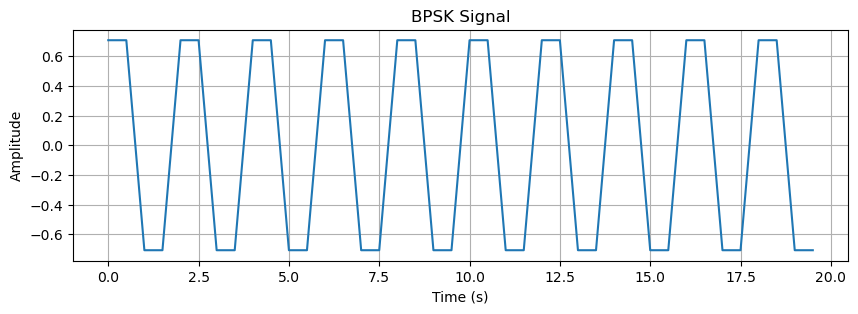

In [23]:
# duration = 10  # Signal duration in seconds
# symbol_rate = 2  # Symbol rate in symbols per second
# random_pattern = False  # Use None for random pattern, or provide a fixed pattern as a list
# upsample_factor = 4

# # signal = upsample_bpsk_gen(duration, symbol_rate, random_pattern)
# signal = bb_gen(duration, random_pattern, 'qpsk')
# plot_timing(signal, symbol_rate)

In [72]:
# Create the QPSK symbol map:
# https://www.wavewalkerdsp.com/2022/06/08/building-a-psk-and-qam-modulator-in-python/
# QPSKMapper =(np.sqrt(2) / 2) * np.array([1+1j, 1-1j, -1+1j, -1-1j])

SymbolMapper = gen_pattern('qpsk')

In [91]:
def generate_rrc_filter(N, alpha):
    n = np.arange(-N/2, N/2)
    h = np.sinc(n) * np.cos(np.pi * alpha * n) / (1 - (2 * alpha * n)**2)
    return h / np.sum(h)

In [98]:
def bb_gen(symbol_num: int, upsample: int = 4):
    # Randomly generate some QPSK symbols:
#     ns = 16
    mapIndex = np.random.randint(0, len(SymbolMapper), symbol_num) 
    print(f"mapIndex={mapIndex}")
    Symbols = SymbolMapper[mapIndex]
    print(f"Symbols={Symbols}")
    # Define the samples per symbol, which is also the pulse shaping filter length:
#     upsample = 4
    # Upsample the symbols:

    SymbolsUpsampled = np.zeros(symbol_num*upsample, dtype = complex)

    print(f"SymbolsUpsampled = {SymbolsUpsampled}")
    SymbolsUpsampled[::upsample] = Symbols
    print(f"SymbolsUpsampled = {SymbolsUpsampled}")
    #Define the pulse shaping filter:

#     pulseShape = np.ones(upsample)
    
#     # Apply the pulse shaping filter:
#     Signal = np.convolve(SymbolsUpsampled, pulseShape)
    
    # Define the raised cosine pulse shaping filter
    alpha = 0.35  # Adjust alpha based on your needs
#     rc_filter = signal.rrcosfilter(symbol_num * upsample, alpha)
    num_symbols = symbol_num * upsample
    rrc_filter = generate_rrc_filter(num_symbols, alpha)
    Signal = np.convolve(SymbolsUpsampled, rrc_filter, mode='full')[:len(SymbolsUpsampled)]
    
    return Signal

In [99]:
complex_signal = bb_gen(2, 4)

mapIndex=[1 1]
Symbols=[0.70710678-0.70710678j 0.70710678-0.70710678j]
SymbolsUpsampled = [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
SymbolsUpsampled = [0.70710678-0.70710678j 0.        +0.j         0.        +0.j
 0.        +0.j         0.70710678-0.70710678j 0.        +0.j
 0.        +0.j         0.        +0.j        ]


In [84]:
complex_signal

array([-0.70710678+0.70710678j, -0.70710678+0.70710678j,
       -0.70710678+0.70710678j, -0.70710678+0.70710678j,
        0.70710678-0.70710678j,  0.70710678-0.70710678j,
        0.70710678-0.70710678j,  0.70710678-0.70710678j,
        0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ])

In [77]:
def plot_complex(complex_signal):
    # Separate the real and imaginary parts
    real_part = np.real(complex_signal)
    imaginary_part = np.imag(complex_signal)

    # Create timing bins (assuming 16 bins for your data)
    timing_bins = range(len(complex_signal))

    # Create two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

    # Plot the real part with "*" markers
    ax1.plot(timing_bins, real_part, label='Real Part', color='blue', marker='*')
    ax1.set_ylabel('Real Part')
    ax1.legend()
    ax1.grid(True)
    ax1.set_title('Real Part vs. Timing Bin')

    # Plot the imaginary part with "*" markers
    ax2.plot(timing_bins, imaginary_part, label='Imaginary Part', color='orange', marker='*')
    ax2.set_xlabel('Timing Bin')
    ax2.set_ylabel('Imaginary Part')
    ax2.legend()
    ax2.grid(True)
    ax2.set_title('Imaginary Part vs. Timing Bin')

    plt.tight_layout()
    plt.show()

In [78]:
def plot_const(complex_signal):
    # Separate the real and imaginary parts
    real_part = np.real(complex_signal)
    imaginary_part = np.imag(complex_signal)
    
    # Create a constellation plot
    plt.figure(figsize=(6, 6))
    plt.scatter(real_part, imaginary_part, marker='o', color='b')
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.title('Constellation Diagram')
    plt.grid(True)
    plt.show()

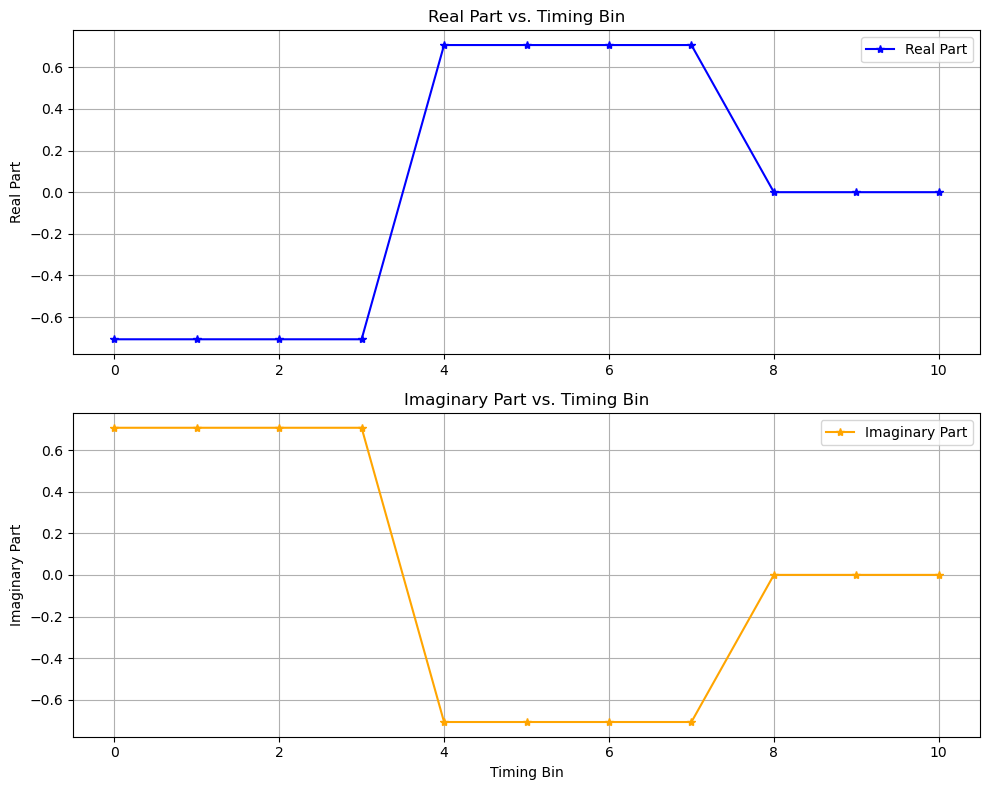

In [79]:
plot_complex(complex_signal)

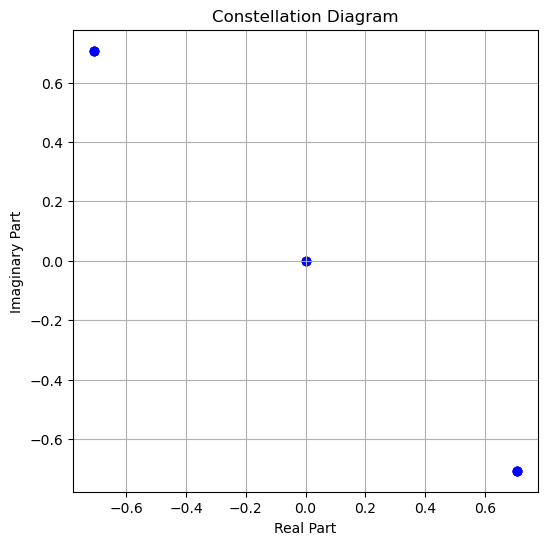

In [80]:
plot_const(complex_signal)